# **Travel Insurance - Capstone Project 3**

*Travel insurance* / asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan finansial kepada pemegang polis selama melakukan perjalanan, baik domestik maupun internasional. Perlindungan tersebut mencakup berbagai risiko, mulai dari biaya medis, kerusakan atau kehilangan bagasi, pembatalan perjalanan, hingga kecelakaan, cacat permanen, dan kematian.

Untuk mendapatkan manfaat asuransi, pemegang polis harus membayar premi kepada perusahaan asuransi. Besarnya premi tergantung pada berbagai faktor, termasuk pertanggungan yang diinginkan, lama perjalanan, dan tujuan perjalanan.

Dalam dunia usaha asuransi, beberapa perusahaan asuransi memiliki agen asuransi (berbentuk perseorangan atau agensi berbadan hukum) sebagai perantara untuk menjual produk asuransinya kepada seseorang yang ingin melakukan perjalanan.

Perusahaan asuransi mendapatkan keuntungan dari asuransi perjalanan melalui berbagai cara, antara lain:

- Pembatalan polis: Jika pemegang polis membatalkan polis, perusahaan asuransi akan menyimpan semua premi yang telah dibayarkan.
- Investasi premi: Perusahaan asuransi dapat menginvestasikan premi yang diterimanya di pasar finansial untuk mendapatkan keuntungan.
- Tidak ada klaim: Jika tidak ada klaim yang terjadi selama masa kontrak asuransi, perusahaan asuransi akan mendapatkan keuntungan dari premi yang telah dibayarkan.

Asuransi perjalanan merupakan salah satu produk asuransi yang penting bagi setiap orang yang sering bepergian. Dengan memiliki asuransi perjalanan, Anda dapat terlindungi dari berbagai risiko finansial yang dapat terjadi selama perjalanan.


## **Problem Statement**

Sebuah perusahaan asuransi perjalanan ingin meningkatkan pendapatan. Salah satu penyebabnya adalah strategi sales / marketing yang tidak efektif. Strategi tersebut mengeluarkan anggaran yang sama untuk semua jenis pelanggan, terlepas dari potensi mereka untuk mengajukan klaim asuransi. Jika strategi ini terus dilakukan, perusahaan akan mengalami kerugian karena harus membayar klaim asuransi.

## **Goals**

Berdasarkan permasalahan tersebut, Perusahaan asuransi perjalanan ingin memprediksi calon pemegang polis yang akan mengajukan klaim asuransi. Caranya adalah dengan menggunakan model prediksi yang dilatih dengan data historis dari pemegang polis yang telah mengajukan klaim. Dengan mengetahui karakteristik calon pemegang polis yang akan mengajukan klaim, sales / marketing asuransi perjalanan dapat fokus pada calon pemegang polis yang berpotensi tidak mengajukan klaim. Informasi tentang karakteristik calon pemegang polis yang akan mengajukan klaim juga dapat digunakan untuk merencanakan pendekatan strategi sales dan marketing yang lebih baik.

## **Analytic Approach**

Analisis data akan dilakukan untuk menemukan perbedaan pola antara pemegang polis yang mengajukan klaim dan tidak mengajukan klaim, serta memperoleh insight tentang peluang klaim berdasarkan jenis produk asuransi yang dijual. Target:
* No (0)  : Tidak mengajukan klaim
* Yes (1) : Mengajukan klaim

Selanjutnya, kita akan membangun model yang diharapkan dapat membantu perusahaan memprediksi kemungkinan seorang calon pemegang polis akan mengajukan klaim atau tidak. Oleh karena itu, model yang akan dibuat adalah model klasifikasi. Pemodelan akan dilakukan menggunakan beberapa algoritma model klasifikasi seperti Logistic Regression, Desicion Tree, KNN, dan XGBoost.

Berikut beberapa kemungkinan yang dapat terjadi saat model mendefinisian status klaim pemegang polis:

![Metric](https://miro.medium.com/v2/resize:fit:640/format:webp/1*jMs1RmSwnYgR9CsBw-z1dw.png)

* TN : Jumlah pemegang polis yang memang benar tidak melakukan klaim
* TP : Jumlah pemegang polis yang memang benar melakukan klaim

- Type 1 error (FP) : Jumlah pemegang polis yang dinyatakan melakukan klaim padahal tidak melakukan klaim.  
Konsekuensi : Dana asuransi dari hasil pencairan menjadi idle money (uang menganggur / tidak digunakan untuk apa pun dan tersimpan begitu saja tanpa tujuan yang jelas). Hal ini dapat menghambat pelaksanaan kegiatan lain dalam perusahaan yang juga membutuhkan dana serta terjadinya opportunity loss bagi perusahaan.

- Type 2 error (FN) : Jumlah pemegang polis yang dinyatakan tidak melakukan klaim padahal melakukan klaim  
Konsekuensi : Kurangnya persiapan dana asuransi sehingga dapat menghambat proses klaim pemegang polis, akibatnya kualitas dan kapabilitas perusahaan akan dipertanyakan dan akan berdampak buruk pada penjualan produk di masa depan karena hilangnya kepercayaan masyarakat.

Melihat resiko akibat kesalahan pendefinisian kelas positif dan negatif, maka fokus utama dari model yang akan kita buat adalah metric evaluation yang akan digunakan adalah ROC/AUC (Receiver Operating Characteristic) sebagai metric utama. Metric Accuracy tidak dipilih karena setelah diteliti, data merupakan data imbalance. Kita juga akan meminimalkan Error type 2 karena konsekuensi dari False Negative lebih serius daripada False Positives. Error tipe 2 ini jenis kesalahan ini berpotensi menurunkan pendapatan perusahaan yang diakibatkan dari kehilangan calon pelanggan potensial.Oleh karena itu, metric evaluation yang akan digunakan adalah recall score sebagai metric utama. Metric Accuracy tidak dipilih karena setelah diteliti, data merupakan data imbalance. Beberapa model akan diseleksi berdasarkan hasil evaluasi metriknya dan model dengan performa terbaik akan dipilih untuk dilanjutkan pada proses hyperparameter tuning dengan harapan dapat meningkatkan performa model.

In [1]:
# Import Libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

# Imbalance Dataset
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Evaluation
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score
from sklearn.metrics import roc_auc_score

# Saving model
import pickle

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## **Data Understanding**

In [2]:
# Import data
df = pd.read_csv('data_travel_insurance.csv')
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (44328, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


### **Columns Information**

-	Agency : Nama agensi asuransi perjalanan
-	Agency Type : Jenis agensi asuransi perjalanan (airlines/penerbangan atau travel agency)
-	Distribution Channel : Saluran distribusi agensi (online / offline)
-	Product Name : Nama produk asuransi perjalanan yang dibeli pemegang polis
-   Gender : jenis kelamin pemegang polis
-	Duration : Durasi perjalanan (hari)
-	Destination : Tujuan perjalanan
-	Net Sales : Total penjualan bersih asuransi perjalanan (jumlah penjualan kotor perusahaan dikurangi retur, tunjangan, dan diskon)
-	Commission (in value) : Komisi yang diterima agensi asuransi perjalanan dari perusahaan asuransi
-	Age : Usia pemegang polis
-	Claim : Status klaim asuransi pemegang polis 

Berikut 5 baris teratas dari dataset:

In [3]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [4]:
# Data unique tiap kolom
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelDesc

,Column Name,Number of Unique,Unique Sample
0,Agency,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Online, Offline]"
3,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,2,"[F, nan, M]"
5,Duration,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision (in value),915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
9,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 32, 61, 49, 56, 25, 50, 34, 38, 44, 118, 45, 53, 20, 30, 41, 69, 52, 40, 70, 76,

### **Numerical Features**

In [5]:
# Deskripsi kolom numerikal
display(df.describe())

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


**Data Distribution**

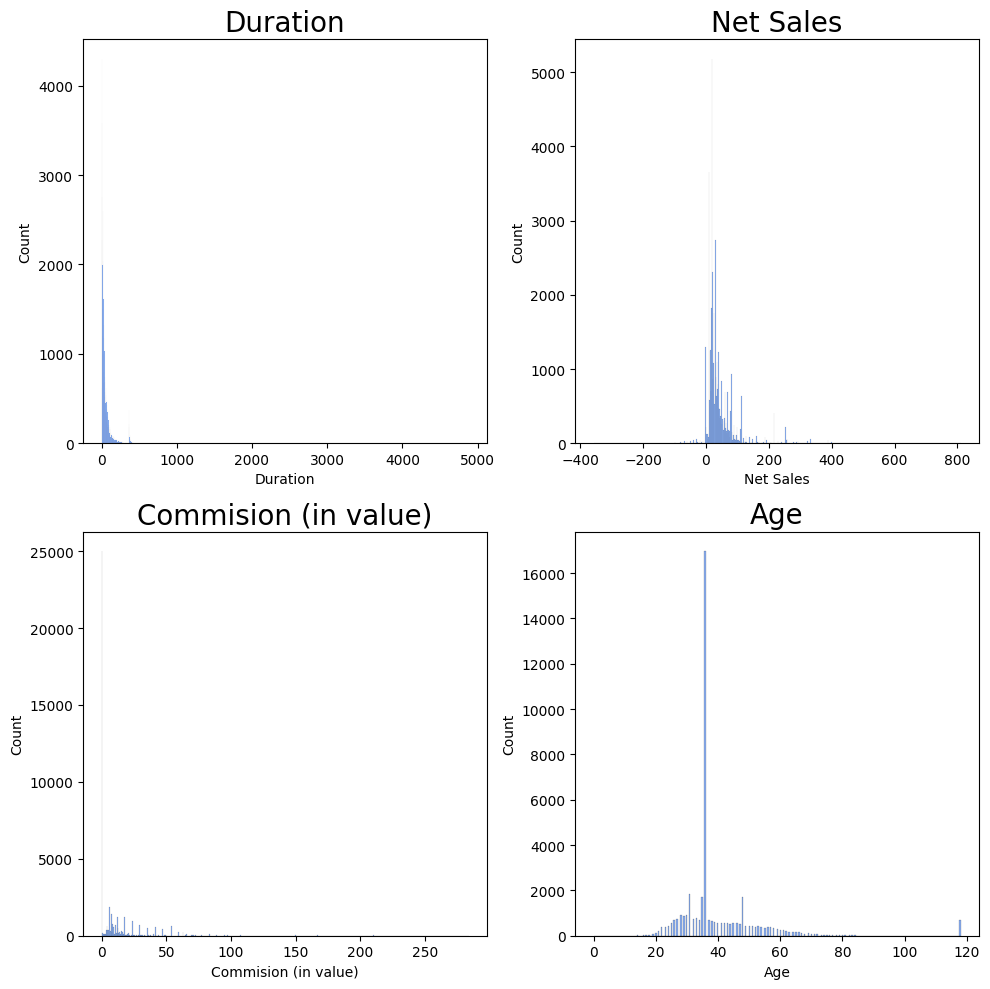

In [6]:
plt.figure(figsize=(10, 10))
plotnumber = 1
num_features = df.select_dtypes(include='number').columns

for feature in num_features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.histplot(data=df,x=feature,color='cornflowerblue')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout()

**Outliers**

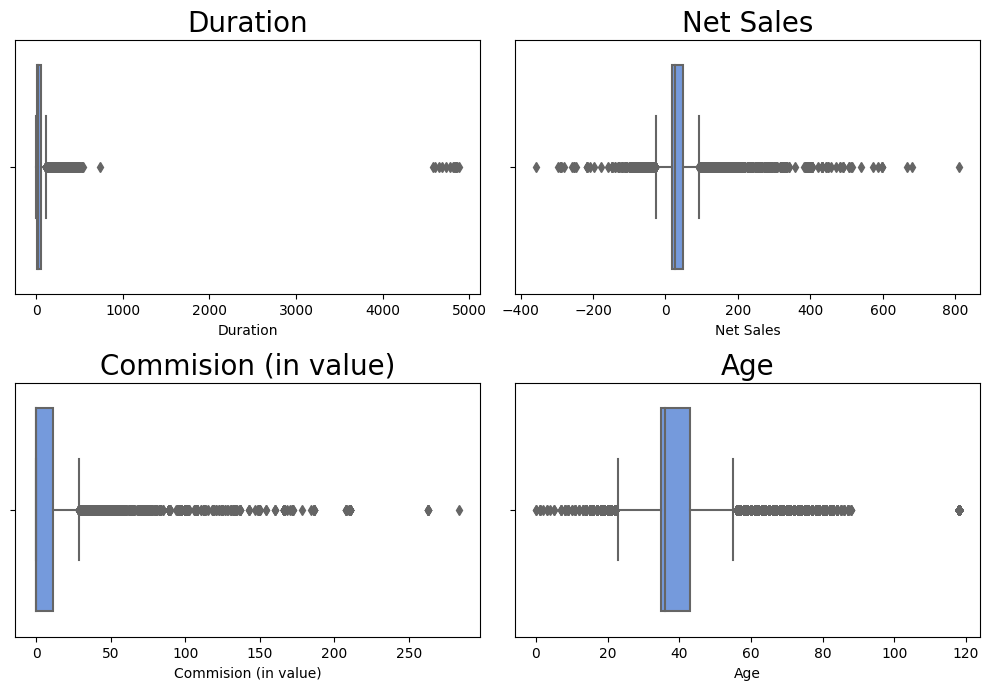

In [7]:
plt.figure(figsize=(10, 10))
plotnumber = 1
num_features = df.select_dtypes(include='number').columns

for feature in num_features:
    ax = plt.subplot(3, 2, plotnumber)
    sns.boxplot(data=df,x=feature,color='cornflowerblue')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout()

**Penjelasan**

- Sebagian besar data berkonsentrasi di sekitar angka rendah, tetapi ada beberapa data yang memiliki durasi yang sangat tinggi. Ini menunjukkan adanya kemungkinan outlier.
- Pada kolom net sales distribusi tampaknya mendekati normal tetapi memiliki beberapa outlier di bagian kanan.
- Pada kolom Commision (in value) kebanyakan data berada di angka rendah dengan beberapa nilai yang lebih tinggi, menunjukkan kemungkinan outlier.
- Kebanyakan data berkonsentrasi di sekitar usia 30-50, tetapi ada beberapa data di atas usia 100, yang mungkin perlu diverifikasi lebih lanjut.

**Data Correlation**

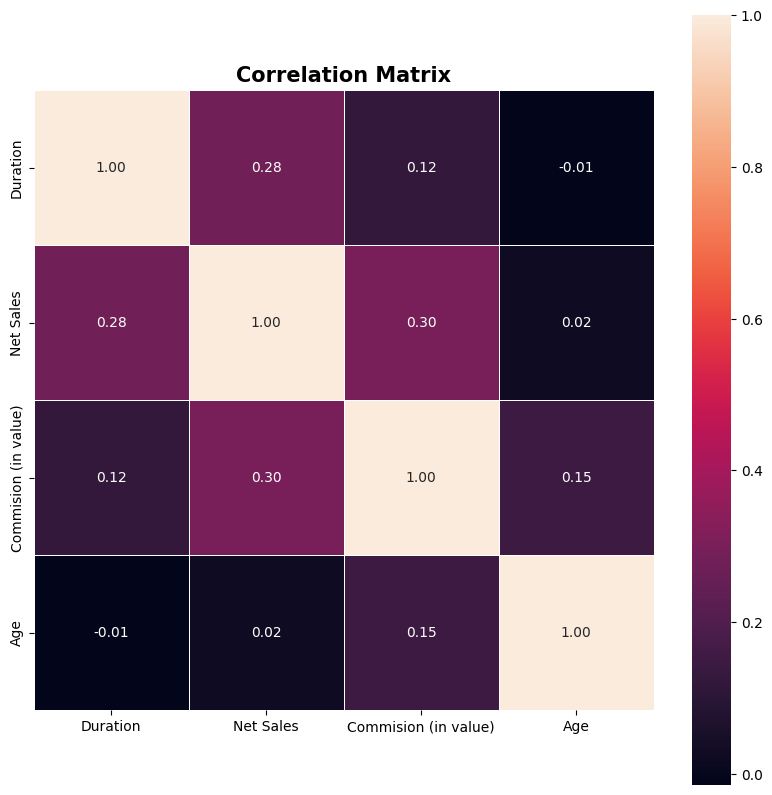

In [8]:
df_numerical = df.select_dtypes(exclude='object')

plt.figure(figsize = (10, 10))
corr = df_numerical.corr(method='spearman')
sns.heatmap(corr, annot = True, fmt = '.2f', square = True, linewidths = .5)
plt.title('Correlation Matrix', size = 15, weight = 'bold')
plt.show()

**Penjelasan**

- kolom Net Sales memiliki korelasi yang cukup tinggi terhadap kolom Commision (in value)

### **Categorical Features**

In [9]:
# Deskripsi kolom kategorikal
display(df.describe(include='object'))

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


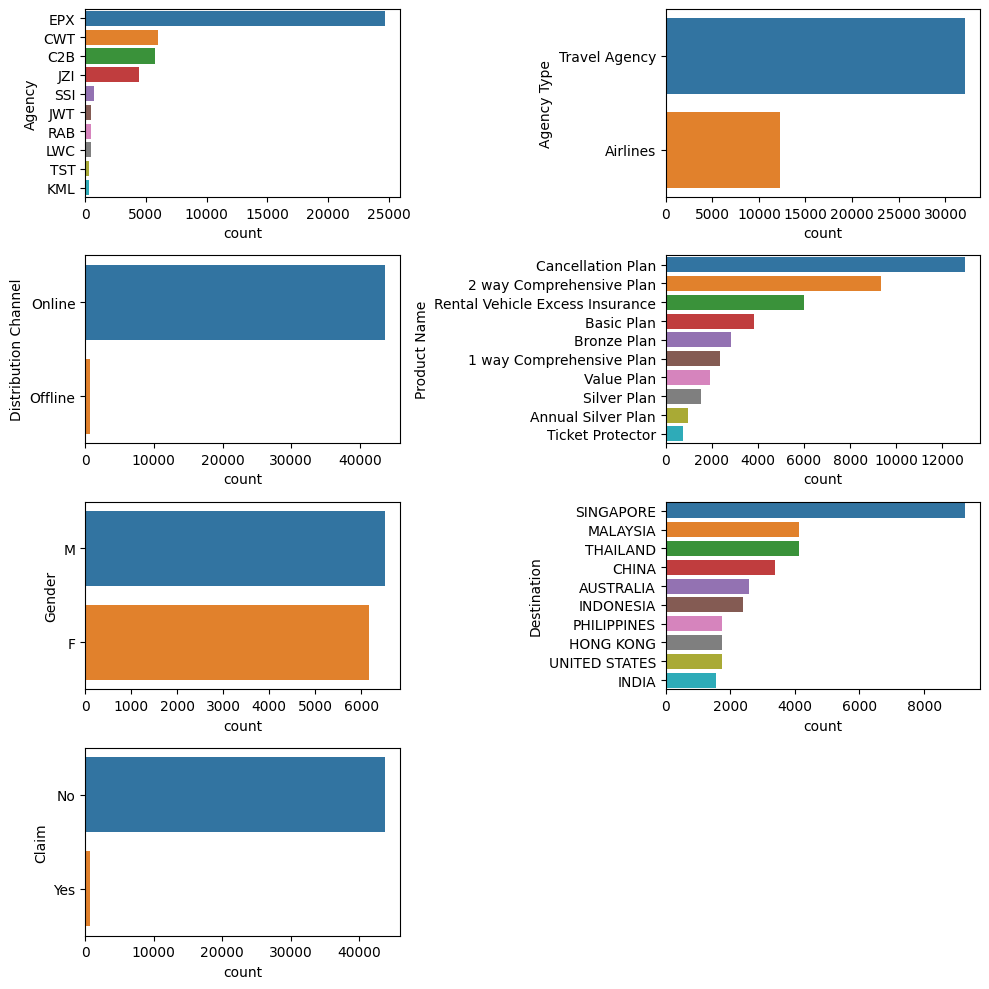

In [10]:
df_categorical = df.select_dtypes(include='object')

count = 0
fig = plt.figure(figsize=(10,10))
for kolom in df_categorical.columns:
    count += 1
    plt.subplot(4,2,count)
    sns.countplot(y = kolom, data = df_categorical, order = df_categorical[kolom].value_counts().sort_values(ascending = False).head(10).index)
    fig.tight_layout()
plt.show()

**Penjelasan**

- Agency EPX adalah agen dengan jumlah transaksi terbanyak, diikuti oleh C2B.
- Kebanyakan transaksi berasal dari tipe Travel Agency.
- Hampir semua transaksi dilakukan melalui distribusi channel saluran online.
- Produk dengan nama "Cancellation Plan" dan "2-way Comprehensive Plan" adalah produk yang paling banyak dijual.
- Kebanyakan pelanggan memilih destinasi di Asia, khususnya ke Singapura

### **Checking Imbalance**

In [11]:
# Check Claim Status
claim_yes = df[df['Claim'] == 'Yes'].count()[1]
claim_no = df[df['Claim'] == 'No'].count()[1]

print('Jumlah pemegang polis yang melakukan claim:', claim_yes)
print('Persentase claim:', (claim_yes/(claim_yes+claim_no)*100),'%')

print('Jumlah pemegang polis yang tidak melakukan claim:', claim_no)
print('Persentase tidak claim:', (claim_no/(claim_yes+claim_no)*100),'%')

Jumlah pemegang polis yang melakukan claim: 677
Persentase claim: 1.527251398664501 %
Jumlah pemegang polis yang tidak melakukan claim: 43651
Persentase tidak claim: 98.4727486013355 %


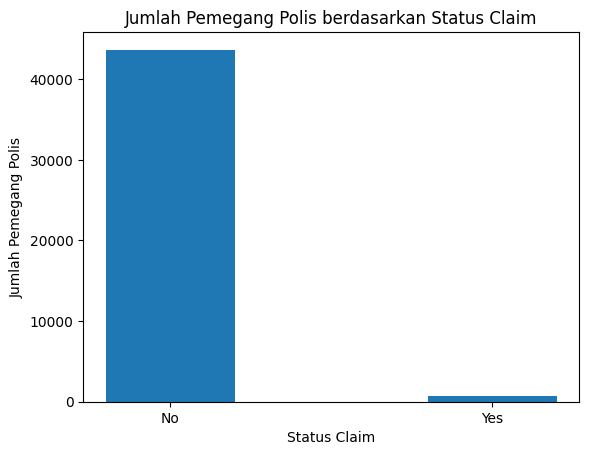

In [12]:
# Visualisasi Claim Status
claim_count = df.groupby(by=['Claim']).size().reset_index(name='counts')

plt.bar(claim_count['Claim'], claim_count['counts'], width = 0.4)
plt.xlabel('Status Claim')
plt.ylabel('Jumlah Pemegang Polis')
plt.title('Jumlah Pemegang Polis berdasarkan Status Claim')
plt.show()

### **Penjelasan**

Secara umum dapat kita ketahui:

- Dataset terdiri dari 44328 baris data dan 11 kolom/variabel dengan 2 jenis tipe data :
    - 4 Variabel Numerik : Duration, Net Sales, Commision (in value), Age
    - 7 Variabel Categorical/Object : Agency, Agency Type, Distribution Channel, Product Name, Gender, Destination, Claim
- Terdapat missing value pada kolom gender yang dilabeli dengan NaN.
- Nilai terkecil pada variabel Duration adalah -1, yang mana seharusnya tidak ada durasi perjalanan yang bernilai negatif. Selain itu, nilai maximum duration adalah 4881 hari (13 tahun) sehingga akan dilakukan penelitian lebih lanjut terhadap maximum durasi perjalanan yang bisa dicover oleh mayoritas asuransi perjalanan.
- Variabel Net Sales memiliki data bernilai negatif. Hal ini normal saja karena net sales yang negatif dapat didefinisikan sebagai kerugian dari hasil penjualan produk setelah dikurangi retur, tunjangan, dan diskon.
- Variable commission (in value) memiliki nilai 0. Pemberian komisi / upah tambahan biasanya dilakukan ketika penghasilan dari penjualan produk asuransi telah mencapai / melebihi target. Dengan begitu, ketika perusahaan mengalami kerugian, sangat mungkin bagi perusahaan untuk tidak memberikan komisi pada agensi. Namun, semua hal itu kembali lagi kepada kesepakatan yang telah dibuat antara pihak perusahaan asuransi dan agensi.
- Variable Net Sales memiliki korelasi yang cukup tinggi terhadap variable Commision (in value).
- Terdapat pemegang polis yang berusia diatas 100 tahun, dimana ini sangat jarang terjadi, sehingga data ini mungkin dapat dikategorikan sebagai outlier. Agar tidak berdasarkan pendapat pribadi saja, akan dilakukan penelitian lebih lanjut terhadap maksimum umur yang dapat ditanggung oleh asuransi perjalanan untuk menentukan batasan outlier.
- Agensi EPX menjadi agency dengan jumlah transaksi terbanyak pada dataset
- Tipe agensi dengan transaksi terbanyak adalah tipe travel.
- Distribusi online menjadi channel distribusi yang paling sering digunakan dalam penjualan asuransi.
- Cancellation Plan dan 2-way Comprehensive Plan adalah produk yang paling banyak dijual.
- Destinasi terpopuler adalah Singapura. Kemungkinan hal ini terjadi karena dataset ini berdasarkan agensi yang ada di Singapura sehingga sebagian besar pembeli produk asuransi juga kemungkinan berasal dari Singapura.
- Data tergolong imbalance karena persentase pemegang polis yang melakukan claim hanya 1.527% sedangkan yang tidak melakukan claim mencapai 98.472%. Oleh karena itu data perlu dilakukan oversampling sebelum pemodelan.

## **Data Cleaning**

### **Missing Value**

In [13]:
# jumlah missing value per kolom
df.isna().sum()

Agency                  0    
Agency Type             0    
Distribution Channel    0    
Product Name            0    
Gender                  31647
Duration                0    
Destination             0    
Net Sales               0    
Commision (in value)    0    
Age                     0    
Claim                   0    
dtype: int64

In [14]:
# proporsi missing value pada kolom gender
df.isna().sum()/df.shape[0]*100

Agency                  0.000000 
Agency Type             0.000000 
Distribution Channel    0.000000 
Product Name            0.000000 
Gender                  71.392799
Duration                0.000000 
Destination             0.000000 
Net Sales               0.000000 
Commision (in value)    0.000000 
Age                     0.000000 
Claim                   0.000000 
dtype: float64

In [15]:
df[df['Gender'].isna()]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
5,EPX,Travel Agency,Online,Cancellation Plan,NaN,2,SINGAPORE,10.0,0.00,36,No
6,EPX,Travel Agency,Online,1 way Comprehensive Plan,NaN,25,"KOREA, REPUBLIC OF",50.0,0.00,36,No
7,EPX,Travel Agency,Online,Cancellation Plan,NaN,90,SINGAPORE,78.0,0.00,22,No
...,...,...,...,...,...,...,...,...,...,...,...
44322,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,6,THAILAND,40.0,0.00,36,No
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


<Axes: >

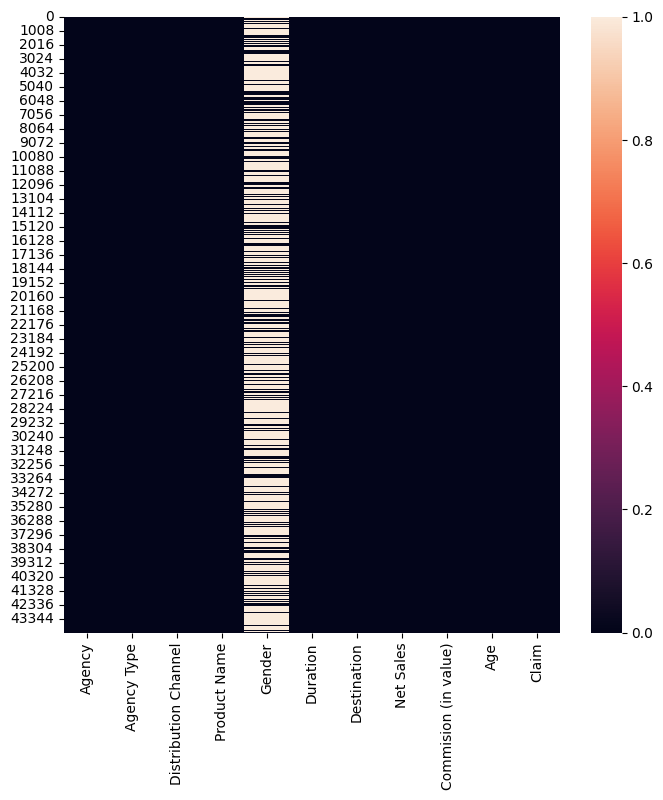

In [16]:
# sebaran missing value di dalam data
plt.figure(figsize=(8,8))
sns.heatmap(df.isna())

**Penjelasan dan Tindakan**

- Persentase missing value pada kolom gender terlalu besar, yaitu 71,39%. Hal ini menyebabkan data menjadi tidak lengkap dan tidak dapat diandalkan untuk mengklasifikasikan pemegang polis yang melakukan klaim/tidak berdasarkan gender.

- Selain itu, memasukkan jenis kelamin dalam model machine learning sebaiknya tidak dilakukan karena dapat menimbulkan bias. Hal ini sesuai dengan AI Ethic yang mengedepankan hukum fairness, yaitu AI tidak boleh diskriminatif terhadap gender, agama, etnis, atau suatu golongan saat mengambil keputusan. Oleh karena itu, kolom gender akan dihapus.

In [17]:
# Menghapus kolom gender
df.drop(['Gender'], axis=1, inplace=True)
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (44328, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Duration              44328 non-null  int64  
 5   Destination           44328 non-null  object 
 6   Net Sales             44328 non-null  float64
 7   Commision (in value)  44328 non-null  float64
 8   Age                   44328 non-null  int64  
 9   Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.4+ MB


### **Duplicates**

In [18]:
# jumlah data duplikat
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 5004


In [19]:
df[df.duplicated()]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
331,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,No
360,EPX,Travel Agency,Online,Cancellation Plan,6,MALAYSIA,10.0,0.00,36,No
473,EPX,Travel Agency,Online,Cancellation Plan,11,MALAYSIA,10.0,0.00,36,No
488,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,No
636,EPX,Travel Agency,Online,1 way Comprehensive Plan,3,MALAYSIA,20.0,0.00,36,No
...,...,...,...,...,...,...,...,...,...,...
44309,EPX,Travel Agency,Online,2 way Comprehensive Plan,49,VIET NAM,20.0,0.00,36,No
44311,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,5,THAILAND,29.7,17.82,38,No
44313,EPX,Travel Agency,Online,Cancellation Plan,5,CHINA,14.0,0.00,36,No
44315,EPX,Travel Agency,Online,1 way Comprehensive Plan,5,THAILAND,20.0,0.00,36,No


**Penjelasan dan Tindakan**

- Persentase missing value pada kolom gender terlalu besar yaitu 71.39% sehingga akan sulit untuk mengklasifikasikan pemegang polis yang melakukan klaim/tidak berdasarkan gender. Oleh karena itu, kolom gender akan dihapus.

In [20]:
# Menghapus data duplikat
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index().drop(columns = {'index'})

print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (39324, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39324 entries, 0 to 39323
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39324 non-null  object 
 1   Agency Type           39324 non-null  object 
 2   Distribution Channel  39324 non-null  object 
 3   Product Name          39324 non-null  object 
 4   Duration              39324 non-null  int64  
 5   Destination           39324 non-null  object 
 6   Net Sales             39324 non-null  float64
 7   Commision (in value)  39324 non-null  float64
 8   Age                   39324 non-null  int64  
 9   Claim                 39324 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.0+ MB


In [21]:
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 0


### **Outliers**

#### **`Duration` Column**

In [22]:
df.sort_values(by='Duration', ascending=False)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
18160,SSI,Airlines,Online,Ticket Protector,4881,SINGAPORE,0.13,0.04,48,No
4556,SSI,Airlines,Online,Ticket Protector,4857,SINGAPORE,0.32,0.09,48,No
37982,SSI,Airlines,Online,Ticket Protector,4847,SINGAPORE,0.32,0.09,48,No
18645,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,No
37871,SSI,Airlines,Online,Ticket Protector,4831,SINGAPORE,0.32,0.09,48,No
...,...,...,...,...,...,...,...,...,...,...
36266,JZI,Airlines,Online,Basic Plan,0,THAILAND,18.00,6.30,118,No
32632,JZI,Airlines,Online,Basic Plan,0,MYANMAR,18.00,6.30,27,No
242,JZI,Airlines,Online,Basic Plan,0,CHINA,22.00,7.70,34,No
24015,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.00,6.30,118,No


In [23]:
# Menampilkan data dengan durasi lebih kecil dari 0
df.sort_values(by='Duration').head(2)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
24015,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,No
24245,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


In [24]:
# Menampilkan data dengan durasi lebih besar dari 1095
df[df['Duration']>1095]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
87,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,No
4556,SSI,Airlines,Online,Ticket Protector,4857,SINGAPORE,0.32,0.09,48,No
9712,SSI,Airlines,Online,Ticket Protector,4815,SINGAPORE,0.32,0.09,48,No
11510,SSI,Airlines,Online,Ticket Protector,4652,SINGAPORE,0.32,0.09,48,No
18160,SSI,Airlines,Online,Ticket Protector,4881,SINGAPORE,0.13,0.04,48,No
18645,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,No
20550,SSI,Airlines,Online,Ticket Protector,4580,SINGAPORE,0.32,0.09,48,No
23479,SSI,Airlines,Online,Ticket Protector,4685,SINGAPORE,0.32,0.09,48,No
25589,SSI,Airlines,Online,Ticket Protector,4829,SINGAPORE,0.32,0.09,48,No
33402,SSI,Airlines,Online,Ticket Protector,4609,SINGAPORE,0.32,0.09,48,No


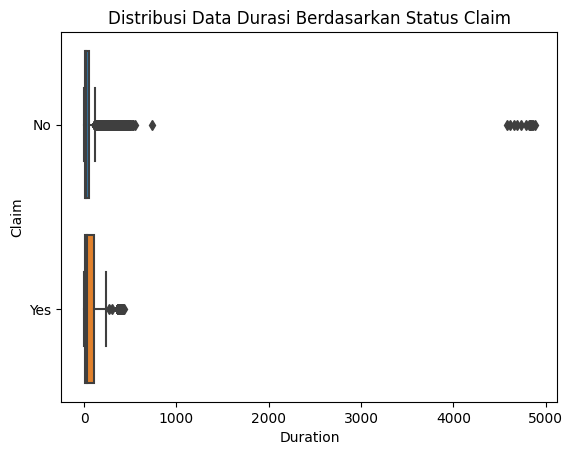

In [25]:
# Visualisasi distribusi duartion
sns.boxplot(data = df,x ='Duration', y='Claim')
plt.title('Distribusi Data Durasi Berdasarkan Status Claim')
plt.show()

**Penjelasan dan Tindakan**

- Ditemukan data dengan duration yang bernilai negatif (-1), dimana secara logika seharusnya tidak ada durasi perjalanan yang bernilai negatif.
- Tindakan yang akan dilakukan adalah menghapus data dengan durasi bernilai negatif karena tidak ada cara yang dirasa sesuai untuk mengubah data tersebut.
- Ditemukan data dengan nilai durasi perjalanan yang tidak normal untuk dapat dicover oleh asuransi perjalanan. Ketentuan durasi perjalanan yang dapat dicover oleh asuransi perjalanan tergantung dari nama produk asuransi yang dibeli. Dalam artikel [Squaremouth](https://www.squaremouth.com/travel-advice/how-long-does-travel-insurance-last) disebutkan bahwa untuk asuransi perjalanan jangka panjang umumnya mencakup kurang lebih hingga 1 tahun, namun dapat diperpanjang sampai 36 bulan (1095 hari).
- Tindakan yang akan dilakukan adalah menghapus data dengan durasi yang memiliki nilai lebih dari 1095 karena tidak ada cara yang dirasa sesuai untuk mengubah data tersebut.

In [26]:
# Menghapus data dengan durasi lebih kecil dari 0
df.drop(df[df['Duration']<0].index,inplace=True)
df.sort_values(by='Duration')

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
5924,LWC,Travel Agency,Online,Single Trip Travel Protect Gold,0,MALAYSIA,27.00,17.55,56,No
27858,JZI,Airlines,Online,Basic Plan,0,THAILAND,18.00,6.30,24,No
22435,RAB,Airlines,Online,Value Plan,0,BRUNEI DARUSSALAM,15.00,6.00,24,No
4806,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,UNITED STATES,9.90,5.94,59,No
6926,JWT,Airlines,Online,Value Plan,0,INDIA,93.00,37.20,118,No
...,...,...,...,...,...,...,...,...,...,...
37871,SSI,Airlines,Online,Ticket Protector,4831,SINGAPORE,0.32,0.09,48,No
18645,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,No
37982,SSI,Airlines,Online,Ticket Protector,4847,SINGAPORE,0.32,0.09,48,No
4556,SSI,Airlines,Online,Ticket Protector,4857,SINGAPORE,0.32,0.09,48,No


In [27]:
# Menghapus data dengan durasi lebih besar dari 1095
df.drop(df[df['Duration']>=1095].index,inplace=True)
df.sort_values(by='Duration')

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
36266,JZI,Airlines,Online,Basic Plan,0,THAILAND,18.00,6.30,118,No
4806,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,UNITED STATES,9.90,5.94,59,No
14009,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,4.88,1.37,48,No
39024,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,5.80,1.63,48,No
6304,JWT,Airlines,Online,Value Plan,0,INDIA,124.00,49.60,118,No
...,...,...,...,...,...,...,...,...,...,...
30377,C2B,Airlines,Online,Annual Silver Plan,519,SINGAPORE,216.00,54.00,60,No
33280,C2B,Airlines,Online,Annual Silver Plan,529,SINGAPORE,216.00,54.00,68,No
922,LWC,Travel Agency,Online,Annual Travel Protect Silver,531,UNITED STATES,229.80,149.37,48,No
16613,C2B,Airlines,Online,Annual Silver Plan,547,SINGAPORE,252.85,63.21,33,No


#### **`Age` Column**

In [28]:
df.sort_values(by='Age', ascending=False)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
22976,JWT,Airlines,Online,Value Plan,23,INDIA,78.0,31.20,118,No
1913,JWT,Airlines,Online,Value Plan,52,INDIA,31.0,12.40,118,No
1833,CCR,Travel Agency,Offline,Comprehensive Plan,63,THAILAND,29.0,9.57,118,No
7802,JWT,Airlines,Online,Value Plan,18,INDIA,50.0,20.00,118,No
29002,EPX,Travel Agency,Offline,2 way Comprehensive Plan,29,TIBET,24.0,0.00,118,No
...,...,...,...,...,...,...,...,...,...,...
25930,C2B,Airlines,Online,Silver Plan,33,SINGAPORE,74.4,18.60,1,No
33448,C2B,Airlines,Online,Bronze Plan,12,SINGAPORE,16.0,4.00,1,No
27020,C2B,Airlines,Online,Silver Plan,10,SINGAPORE,46.8,11.70,1,No
39316,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.50,0,No


In [29]:
# Menampilkan data dengan usia lebih dari 100 tahun
df[df['Age']>100].sort_values(['Age'], ascending=False)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
99,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,No
23368,JWT,Airlines,Online,Value Plan,21,INDIA,31.0,12.40,118,No
27211,JWT,Airlines,Online,Value Plan,17,INDIA,240.0,96.00,118,No
26995,JWT,Airlines,Online,Value Plan,41,INDIA,31.0,12.40,118,No
26981,EPX,Travel Agency,Offline,Cancellation Plan,72,MALAYSIA,0.0,0.00,118,No
...,...,...,...,...,...,...,...,...,...,...
11926,JWT,Airlines,Online,Value Plan,102,INDIA,-78.0,31.20,118,No
11861,JWT,Airlines,Online,Value Plan,24,INDIA,50.0,20.00,118,No
11799,CCR,Travel Agency,Offline,Comprehensive Plan,6,THAILAND,29.0,9.57,118,No
11796,JWT,Airlines,Online,Value Plan,40,INDIA,0.0,12.40,118,No


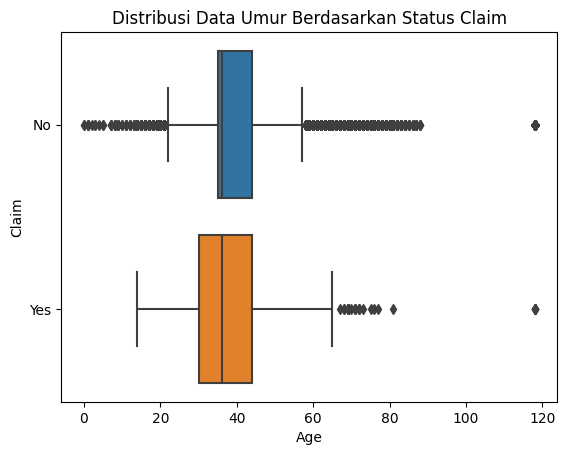

In [30]:
# Visualisasi distribusi age
sns.boxplot(data = df,x ='Age', y='Claim')
plt.title('Distribusi Data Umur Berdasarkan Status Claim')
plt.show()

**Penjelasan dan Tindakan**

- Ditemukan bahwa umur tertinggi pemegang polis asuransi perjalanan adalah 118 tahun, dimana ini sangat jarang terjadi dan data ini mungkin dapat dikategorikan sebagai outlier.
- Berdasarkan maksimum umur yang dapat ditanggung oleh asuransi perjalanan pada berbagai perusahaan. Berdasarkan [compare travel insurance](https://www.comparetravelinsurance.com.au/seniors-travel-insurance/senior-travel-insurance-age-limits), beberapa perusahaan asuransi perjalanan menawarkan asuransi untuk traveler berusia hingga usia 100 tahun. Oleh karena itu, seluruh data pemegang polis yang berumur diatas 100 tahun akan dihapus.
- Untuk pemegang polis yang berumur 0 tahun wajar saja karena asuransi perjalanan juga memberikan layanan mulai dari anak yang berusia beberapa bulan. Maka data akan dipertahankan

In [31]:
# Menghapus data dengan usia lebih besar dari 100
df.drop(df[df['Age']>100].index,inplace=True)
df.sort_values(by='Age')

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
33913,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,-30.00,10.50,0,No
39316,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.00,10.50,0,No
27162,JZI,Airlines,Online,Value Plan,2,MALAYSIA,26.00,9.10,1,No
33448,C2B,Airlines,Online,Bronze Plan,12,SINGAPORE,16.00,4.00,1,No
25930,C2B,Airlines,Online,Silver Plan,33,SINGAPORE,74.40,18.60,1,No
...,...,...,...,...,...,...,...,...,...,...
20658,C2B,Airlines,Online,Silver Plan,27,SINGAPORE,52.65,13.16,87,No
30267,C2B,Airlines,Online,Bronze Plan,18,SINGAPORE,25.50,6.38,87,No
8376,C2B,Airlines,Online,Silver Plan,4,SINGAPORE,15.00,3.75,88,No
30398,TST,Travel Agency,Offline,Travel Cruise Protect,17,MALAYSIA,30.00,10.50,88,No


### **Clean Data**

In [32]:
# Informasi umum dari data yang sudah dibersihkan
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(38888, 10)


,dataFeatures,dataType,null,unique,uniqueSample
0,Agency,object,0,15,"[CWT, SSI]"
1,Agency Type,object,0,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,2,"[Offline, Online]"
3,Product Name,object,0,26,"[Annual Travel Protect Silver, Comprehensive Plan]"
4,Duration,int64,0,423,"[154, 158]"
5,Destination,object,0,136,"[CAYMAN ISLANDS, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF]"
6,Net Sales,float64,0,986,"[-18.0, 23.41]"
7,Commision (in value),float64,0,884,"[31.0, 19.95]"
8,Age,int64,0,88,"[66, 82]"
9,Claim,object,0,2,"[No, Yes]"


**Penjelasan**
- Awalnya, dataset terdiri dari 44.328 baris data dan 11 kolom. Setelah melalui tahapan data cleaning, beberapa data dihapus, sehingga dataset menjadi 38.888 baris data dan 10 kolom.
- Kolom gender dihapus, sehingga dataset menjadi 44.328 baris data dan 10 kolom.
- Pada kolom duration ditemukan beberapa data yang tidak normal (outliers), sehingga 15 data dihapus.
- Pada kolom age juga ditemukan beberapa data yang tidak normal, sehingga dataset akhirnya menjadi 38.888 baris data dan 10 kolom.

## **Exploratory Data Analysis**

### **Analyzing Agencies**

In [33]:
# jumlah pemegang polis yang melakukan pembelian asuransi di tiap agency
df.groupby('Agency')[['Agency']].size().reset_index().rename(columns = {0 : 'Count'}).sort_values(by = 'Count', ascending=False)

,Agency,Count
7,EPX,20961
6,CWT,5725
2,C2B,5334
8,JZI,4185
12,SSI,691
10,LWC,452
11,RAB,440
13,TST,329
9,KML,229
1,ART,192


In [34]:
# jumlah pemegang polis yang melakukan claim di tiap agency
agency_claimed = df[df['Claim']=='Yes'][['Agency','Claim']]
agency_counts = agency_claimed.groupby('Agency').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
agency_counts

,Agency,Count
0,C2B,403
5,EPX,131
4,CWT,64
8,LWC,29
6,JZI,22
7,KML,5
10,SSI,5
11,TST,2
1,CBH,1
2,CCR,1


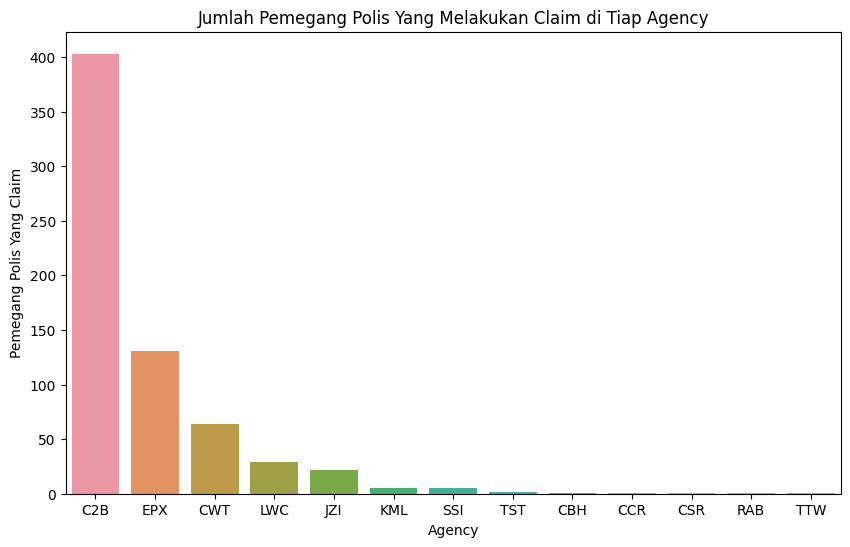

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Agency', y='Count', data=agency_counts)
plt.title('Jumlah Pemegang Polis Yang Melakukan Claim di Tiap Agency')
plt.xlabel('Agency')
plt.ylabel('Pemegang Polis Yang Claim')
plt.show()

**Penjelasan**

- Agensi C2B memiliki persentase klaim tertinggi, yaitu sekitar 7.5% (403 dari 5333). Hal ini mungkin disebabkan oleh faktor-faktor tertentu, misalnya produk yang tidak sesuai dengan kebutuhan atau proses pemasaran yang tidak tepat.

### **Analyzing Products**

In [36]:
# Produk yang paling banyak mendapat klaim
claimed_data = df[df['Claim'] == 'Yes']

total_counts = pd.DataFrame(df.loc[:, 'Product Name'].value_counts())
claimed_counts = pd.DataFrame(claimed_data.loc[:, 'Product Name'].value_counts())

product_counts_combined = total_counts.join(claimed_counts, lsuffix='_total', rsuffix='_claimed')
product_counts_combined.fillna(0, inplace=True)

product_counts_combined.columns = ['Total', 'Claimed']

product_counts_combined = product_counts_combined.sort_values(by='Total', ascending=False)
product_counts_combined

,Total,Claimed
Product Name,,
Cancellation Plan,11007,31.0
2 way Comprehensive Plan,8109,94.0
Rental Vehicle Excess Insurance,5725,64.0
Basic Plan,3599,16.0
Bronze Plan,2634,160.0
1 way Comprehensive Plan,1845,6.0
Silver Plan,1480,108.0
Value Plan,1223,10.0
Annual Silver Plan,849,107.0


In [37]:
ratio_list = []
for i in range(len(product_counts_combined)):
    ratio_list.append((product_counts_combined.iloc[i][1] / product_counts_combined.iloc[i][0])*100)
ratio = pd.DataFrame(ratio_list, index = np.array(product_counts_combined.index))
ratio = ratio.rename(columns = {0:'Ratio'})

ratio_sorted = ratio.sort_values(by = 'Ratio',ascending = False)
ratio_sorted

,Ratio
Annual Silver Plan,12.603062
Annual Gold Plan,11.764706
Annual Travel Protect Gold,11.290323
Single Trip Travel Protect Platinum,10.638298
Spouse or Parents Comprehensive Plan,7.692308
Silver Plan,7.297297
Annual Travel Protect Silver,6.779661
Bronze Plan,6.074412
Annual Travel Protect Platinum,5.882353
Single Trip Travel Protect Gold,5.223881


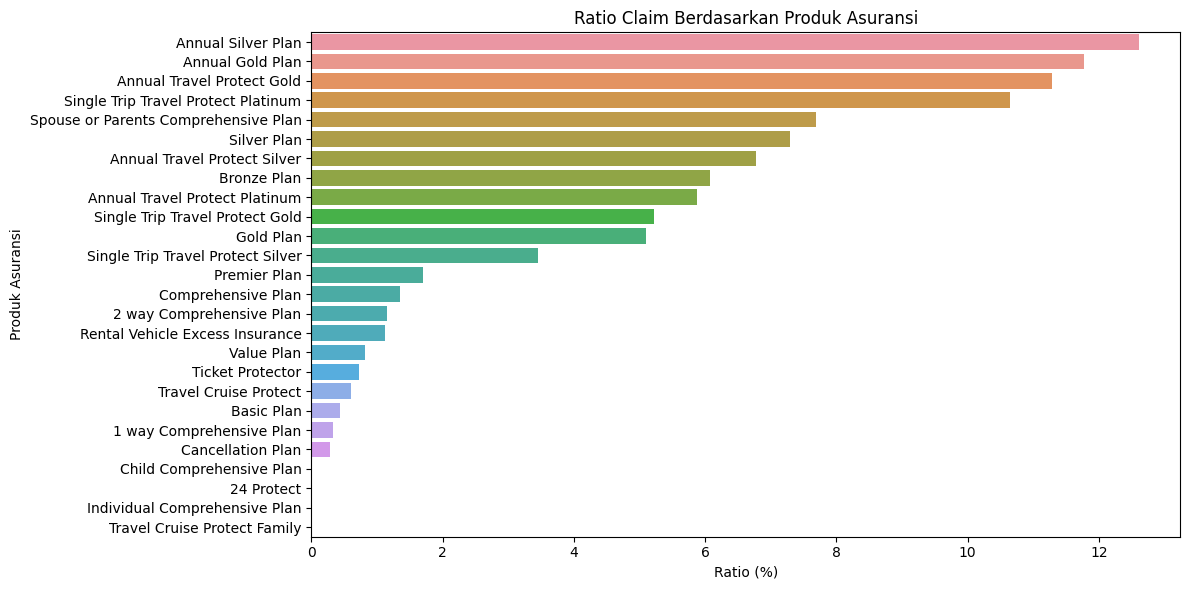

In [38]:
# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(y=ratio_sorted.index, x='Ratio', data=ratio_sorted)
plt.ylabel('Produk Asuransi')
plt.xlabel('Ratio (%)')
plt.title('Ratio Claim Berdasarkan Produk Asuransi')
plt.tight_layout()
plt.show()

**Penjelasan**

- Produk asuransi perjalanan dengan rasio klaim paling besar adalah Annual Silver Plan, Annual Gold Plan, Annual Travel Protect Gold, Single Trip Travel Protect Platinum, dan Spouse or Parents Comprehensive Plan.
- Hal tersebut wajar saja karena, semakin lama durasi perlindungan yang ditawarkan, maka semakin besar juga peluang terjadinya klaim.

### **Analyzing Age**

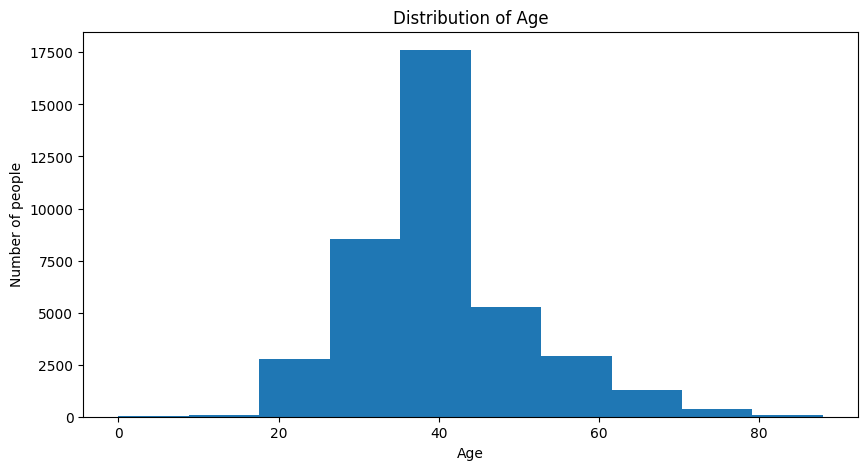

In [39]:
# Distribusi umur pemegang polis

fig = plt.figure(figsize = (10, 5))
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Distribution of Age')
plt.show()

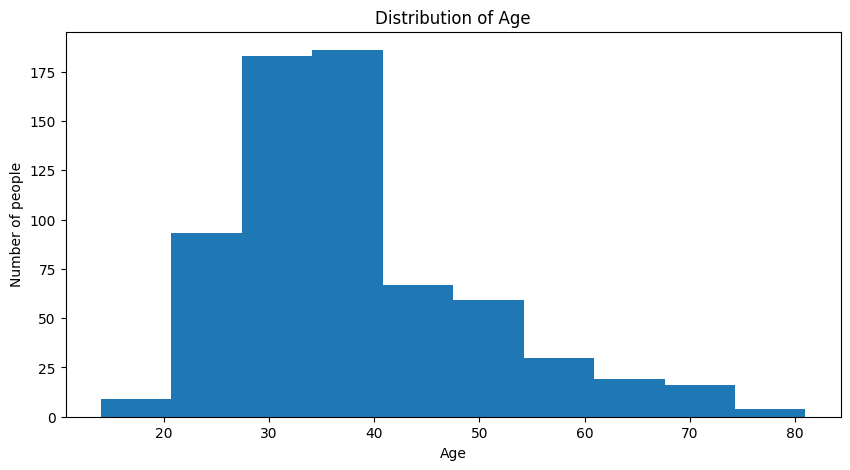

In [40]:
# Mayoritas usia pemegang polis yang mengajukan claim

fig = plt.figure(figsize = (10, 5))
plt.hist(df[df['Claim']=='Yes']['Age'])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Distribution of Age')
plt.show()

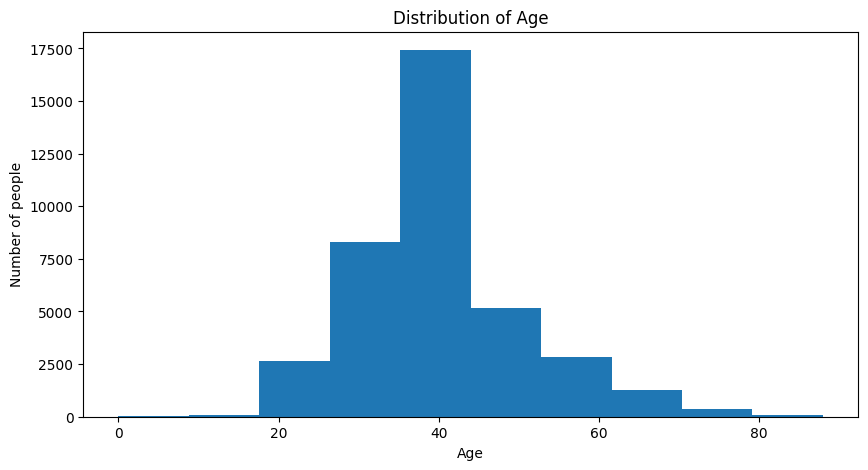

In [41]:
# Mayoritas usia pemegang polis yang tidak mengajukan claim

fig = plt.figure(figsize = (10, 5))
plt.hist(df[df['Claim']=='No']['Age'])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Distribution of Age')
plt.show()

**Penjelasan**

- Mayoritas pemegang polis yang mengajukan klaim adalah usia 30-40 tahun. Penyebabnya mungkin karena sebagian besar traveler masih berusia 20-50 tahun. 
- Rentan usia yang tidak begitu melakukan klaim adalah yang diatas 50 tahun dan dibawah 30 tahun. Hal ini wajar saja karena sebagian besar traveler masih berusia 20-50 tahun.

## **Feature Selection and Feature Engineering**

In [42]:
# Informasi umum dari data yang sudah dibersihkan
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,unique,uniqueSample
0,Agency,object,0,15,"[CCR, KML]"
1,Agency Type,object,0,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,2,"[Offline, Online]"
3,Product Name,object,0,26,"[2 way Comprehensive Plan, Premier Plan]"
4,Duration,int64,0,423,"[457, 104]"
5,Destination,object,0,136,"[JAPAN, SINGAPORE]"
6,Net Sales,float64,0,986,"[138.4, 187.85]"
7,Commision (in value),float64,0,884,"[29.57, 6.94]"
8,Age,int64,0,88,"[77, 80]"
9,Claim,object,0,2,"[No, Yes]"


**Penjelasan dan Tindakan**

Sekarang mari kita melakukan fitur encoding untuk fitur-fitur kategorikal yang kita miliki.
Yang akan kita lakukan adalah:
- Merubah fitur/kolom `Claim` yang awalnya memiliki nilai 'Yes' dan 'No', menajdi 1 dan 0
- Merubah fitur/kolom `Agency Type` menggunakan One Hot Encoding karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
- Merubah fitur/kolom `Distribution Channel` menggunakan One Hot Encoding karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
- Merubah fitur/kolom `Agency` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
- Merubah fitur/kolom `Product Name` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
- Merubah fitur/kolom `Destination` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
- Metode scaling yang akan digunakan adalah Robust scaler karena metode ini tidak terpengaruh oleh data outlier yang memiliki nilai rentang besar.
- Scaling hanya akan diterapkan pada model Logistic Regression dan KNN karena kedua model tersebut membutuhkan asumsi normalitas dan memanfaatkan fungsi jarak.
- Dikarenakan data yang tergolong imbalance pada target. Data perlu dilakukan oversampling sebelum pemodelan. Teknik oversampling yang akan digunakan adalah Synthetic Minority Over-sampling Technique (SMOTE). Kita tidak menggunakan teknik oversampling sederhana untuk menghindari overfitting akibat penduplikasian data yang telah ada sebelumnya. Teknik undersampling juga tidak direkomendasikan karena data claim yang sedikitdapat membuat banyak informasi penting akan hilang, sehingga berpotensi mengurangi performa.

In [43]:
df['Claim'] = df['Claim'].replace({'Yes': 1, 'No': 0})
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,0
39321,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


### **Encoding**

In [44]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Agency Type','Distribution Channel']),
    ('binary', ce.BinaryEncoder(), ['Agency','Product Name','Destination'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination'])])

### **Scaling**

In [45]:
scaler = RobustScaler()

### **Oversampling**

In [46]:
smote = SMOTE(random_state=0)

## **Modeling & Evaluating**

### **Define Feature & Target and Data Splitting**

In [47]:
# Menentukan features dan target
X = df.drop(columns='Claim')
y = df['Claim']

# Data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0,stratify=y)

In [48]:
# define model
dtree = DecisionTreeClassifier(random_state=0)
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=0)
gradboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0, verbosity=0)

**Penjelasan**

- Kita akan menggunakan algoritma klasifikasi untuk membangun model prediksi klaim asuransi. Algoritma yang akan digunakan adalah Logistic Regression, KNN, Decision Tree, Random Forest, XGBoost, dan GradientBoost.
- Model akan dievaluasi menggunakan Pipeline dan Stratified K-Fold Cross Validation karena data yang digunakan merupakan data imbalanced.
- Metric evaluation yang akan digunakan adalah ROC-AUC dan kita tertarik kepada kedua kelas dan data merupakan data imbalance.
- Kita akan mencoba melihat performa model menggunakan hyperparameter default terlebih dahulu. Model dengan performa terbaik dan paling stabil akan dilanjutkan ke proses hyperparameter tuning dengan harapan dapat meningkatkan performa model.

### **Model Benchmarking (Deafult Hyperparameter)**

In [49]:
models = [knn, logreg, dtree, rf, gradboost, xgboost]
resampler = [smote]

list_mean = []
list_std = []
list_score = []

for model in models:

    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', model)
    ])

    skfold = StratifiedKFold(n_splits=5)

    model_cv = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring= 'roc_auc'
    )

    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    list_score.append(model_cv.round(3))

pd.DataFrame({
    'model' : ['KNN', 'Logistic Regression', 'Desicion Tree', 'Random Forest', 'Gradient Boost', 'XGBoost'],
    'mean roc' : list_mean,
    'std roc' : list_std,
    'score' : list_score
}).sort_values('mean roc', ascending=False)

,model,mean roc,std roc,score
1,Logistic Regression,0.804204,0.015607,"[0.773, 0.813, 0.814, 0.808, 0.813]"
4,Gradient Boost,0.802572,0.016769,"[0.787, 0.794, 0.835, 0.796, 0.8]"
5,XGBoost,0.773120,0.016293,"[0.763, 0.757, 0.802, 0.781, 0.763]"
3,Random Forest,0.730068,0.019402,"[0.712, 0.709, 0.763, 0.735, 0.732]"
0,KNN,0.673822,0.024570,"[0.646, 0.643, 0.703, 0.692, 0.684]"
2,Desicion Tree,0.538034,0.019307,"[0.535, 0.548, 0.551, 0.555, 0.502]"


**Penjelasa**

- Model Logistic Regression memiliki nilai mean yang lebih paling baik dibanding model lain, dan stabil dengan nilai standar deviasinya yang sangat kecil yaitu sekitar 0.01. 
- Nilai mean terbaik dari Logistic Regression sebesar 0.804. 

In [50]:
# Prediksi benchmark model ke test set
list_roc_score = []

for model in models :

    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', model)
    ])

    pipe_model.fit(X_train, y_train)

    y_pred = pipe_model.predict(X_test)

    score = roc_auc_score(y_test, y_pred)
    list_roc_score.append(score)

pd.DataFrame({
    'model' : ['KNN', 'Logistic Regression', 'Desicion Tree', 'Random Forest', 'Gradient Boost', 'XGBoost'],
    'roc_score (test_set)': list_roc_score
}).sort_values('roc_score (test_set)', ascending=False)

,model,roc_score (test_set)
1,Logistic Regression,0.766721
4,Gradient Boost,0.730936
0,KNN,0.630450
5,XGBoost,0.611433
3,Random Forest,0.545958
2,Desicion Tree,0.538209


**Penjelasan**
- Terlihat bahwa performa model Logistic Regression saat memprediksi test set masih menjadi yang terbaik diantara model yang lainya.
- Pada test set nilai evaluasi terbaik dari Logistic Regression sebesar 0.766. 
- Mayoritas model mengalami overfitting (menunjukkan performa baik saat training namun buruk saat testing).
- Logistic Regression akan menjadi model yang akan dilanjutkan ke tahap hyperparamtere tuning.

### **Hyperparameter Tuning**

In [51]:
model = LogisticRegression()
pipe_model = Pipeline ([
            ('preprocess', transformer),
            ('scaler', scaler),
            ('resampler', smote),
            ('model', model)
])

skf = StratifiedKFold(n_splits=5)

#hyperparameter
hyperparam_space = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
    'model__solver': ['liblinear', 'sag', 'saga'],
    'model__max_iter': [100,200,300,400,500,1000]
}

grid_search = GridSearchCV(
    pipe_model,
    param_grid = hyperparam_space, 
    cv = skf,
    scoring = 'roc_auc',
    n_jobs = -1 
)

model_tuned = grid_search.fit(X_train, y_train)
logreg_tuning = model_tuned.best_estimator_

result = pd.DataFrame(model_tuned.cv_results_)
result[result['rank_test_score']==1].head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__max_iter,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,8.685459,3.373952,0.044744,0.003928,1,200,l1,saga,"{'model__C': 1, 'model__max_iter': 200, 'model__penalty': 'l1', 'model__solver': 'saga'}",0.773226,0.812579,0.814346,0.807983,0.813134,0.804253,0.015663,1


**Penjelasan**
- Hyperparameter tuning dilakukan menggunakan metode GridSearch dengan mencoba seluruh kombinasi hyperparameter berikut :
    - solver = lbfgs, sag, saga
    - C = 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001
    - max iter = 100, 200, 300
    - penalty : l1, l2
- Terlihat bahwa model setelah tuning dengan nilai mean terbaik adalah model dengan hyperparameter:
    - C: 1
    - max_iter: 200
    - penalty: l1
    - solver: saga 
- Namun dapat dilihat bahwa hasil hyperparameter tuning tidak memiliki efek yang signifikan. Nilai mean dari testing model masih di 0.804.

In [52]:
# Prediksi model hasil hyperparameter tuning ke test set
list_roc_score = []
model = model_tuned.best_estimator_

model.fit(X_train, y_train)

y_pred_rf_tuning = model.predict(X_test)

score = roc_auc_score(y_test, y_pred_rf_tuning)
list_roc_score.append(score)

pd.DataFrame({
    'model' : ['Logistic Regression'],
    'roc_score (test_set)': list_roc_score
}).sort_values('roc_score (test_set)', ascending=False)

,model,roc_score (test_set)
0,Logistic Regression,0.766786


**Penjelasan**
- Terlihat bahwa performa model Logistic Regression setelah di tuning saat memprediksi test set tidak berbeda signifikan dengan model yang belum di tuning.
- Pada test set nilai evaluasi terbaik dari Logistic Regression yang telah di tuning sebesar 0.766. 

### **Feature Importance**

In [53]:
final_model = model_tuned.best_estimator_

coefficients = final_model.named_steps['model'].coef_[0]

feature_onehot = list(final_model.named_steps['preprocess'].transformers_[0][1].get_feature_names_out())
feature_binhot = list(final_model.named_steps['preprocess'].transformers_[1][1].get_feature_names_out())
feature_remainder = list(X.columns[final_model.named_steps['preprocess'].transformers_[2][2]])
feature_names = feature_onehot + feature_binhot + feature_remainder

df_importances = pd.DataFrame({
    'features': feature_names,
    'importance': coefficients
}).sort_values('importance', ascending=False)

df_importances

,features,importance
4,Agency_2,3.356948
5,Agency_3,2.373080
10,Product Name_4,1.458371
9,Product Name_3,0.847657
6,Product Name_0,0.789478
7,Product Name_1,0.424195
20,Net Sales,0.324258
1,Distribution Channel_Online,0.203428
2,Agency_0,0.193293
17,Destination_6,0.112373


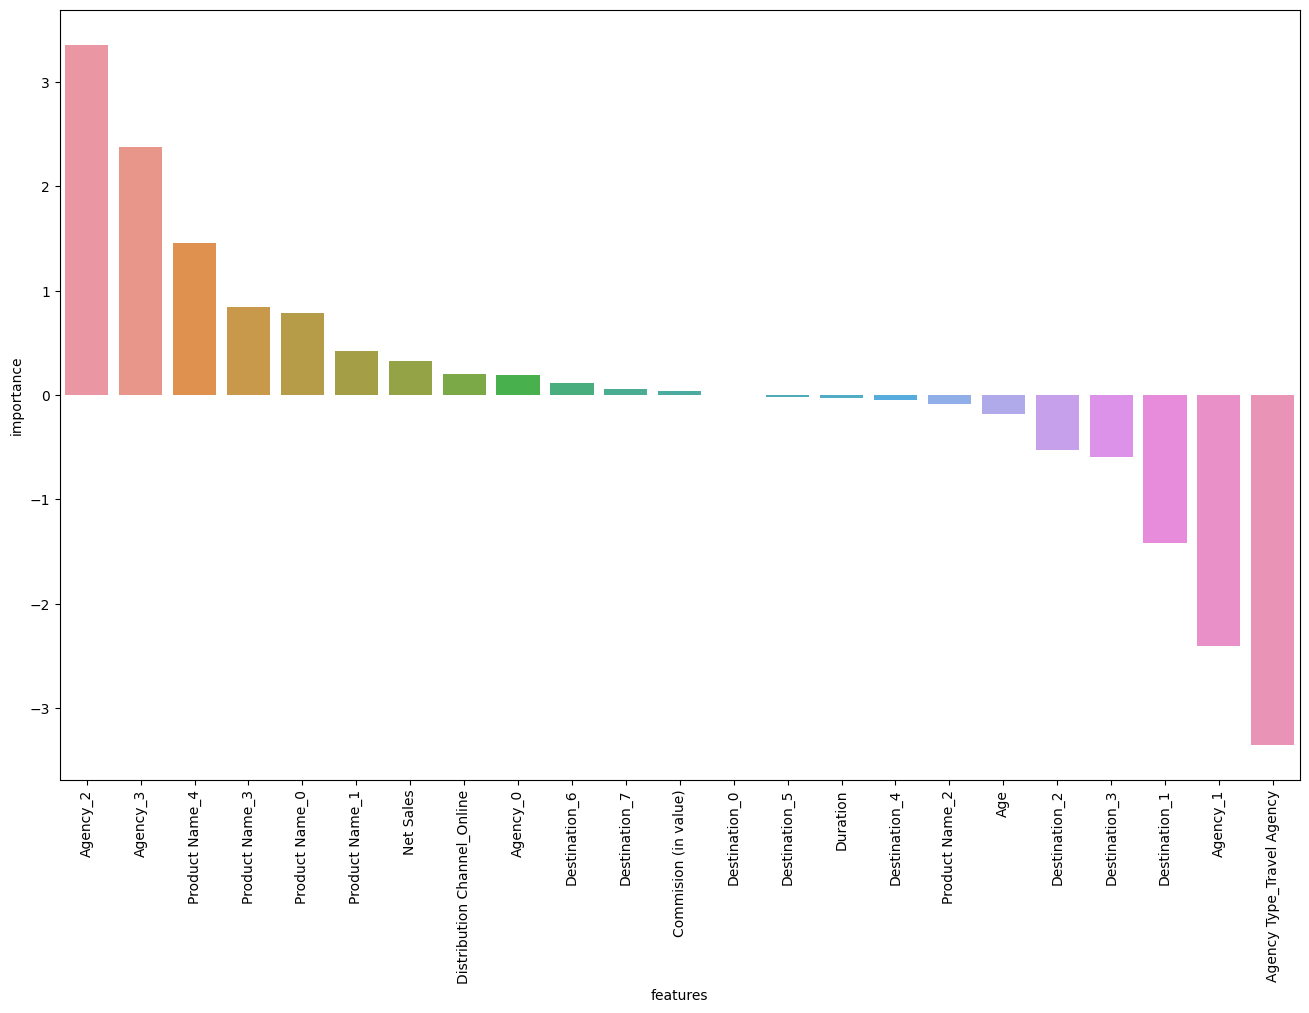

In [54]:
plt.figure(figsize=(16,10))
sns.barplot(data=df_importances.sort_values('importance', ascending=False), x='features', y='importance')
plt.xticks(rotation=90)
plt.show()

**Penjelasan**
- Dari 23 fitur yang ada, fitur Agency_2 menjadi fitur yang paling penting dalam memprediksi dengan nilai 3.35.
- Sementara fitur fitur Agency Type_Travel Agency menjadi fitur yang tidak penting dengan nilai -3.34

### **Confussion Matrix**

In [55]:
print(classification_report(y_test, y_pred_rf_tuning))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      7645
           1       0.06      0.74      0.11       133

    accuracy                           0.80      7778
   macro avg       0.53      0.77      0.50      7778
weighted avg       0.98      0.80      0.87      7778



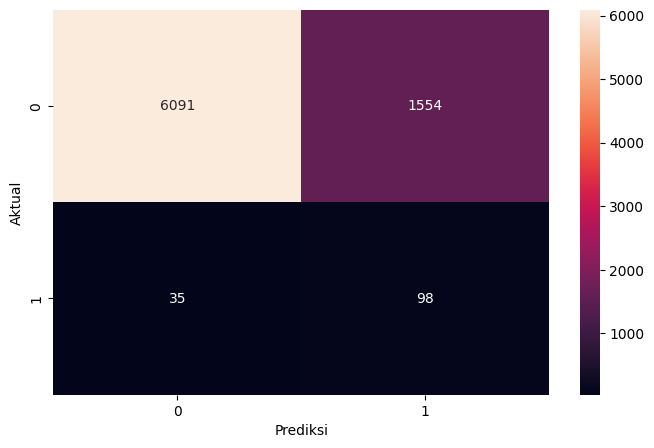

In [56]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuning), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

**Penjelasan**

- Terlihat bahwa model Logistic regression sebelum tuning dan sesudah tuning memiliki hasil evaluasi yang tidak berbeda signifikan.
- Informasi dari confusion matrix pada test set menggunakn model logistic regression yang telah di tuning:

    - Jumlah pemegang polis yang aktualnya claim dan diprediksi akan melakukan claim (True Positive) : 98 orang
    - Jumlah pemegang polis yang aktualnya claim tetapi diprediksi tidak akan melakukan claim (False Negative) : 35 orang
    - Jumlah pemegang polis yang aktualnya tidak claim dan diprediksi tidak akan claim (True Negative) : 6091 orang
    - Jumlah pemegang polis yang aktualnya tidak claim tetapi diprediksi akan claim (False Positive) : 1554 orang
    - Jumlah pemegang polis yang diprediksi akan claim sebanyak 1554 + 98= 1652 orang
    - Jumlah pemegang polis yang diprediksi tidak akan claim sebanyak 6091 + 35 = 6126 orang

### **Model Limitation**

- Model ini hanya dapat digunakan pada data dengan nilai maximum dan minimum pada tiap variabel berikut:
    - Age: 0 hingga 88
    - Net sales: -357.5 hingga 682.0
    - Duration: 0 hingga 740
    - Commision : 0.0 hingga 262.76
- Jika digunakan pada data dengan nilai maximum dan minimum diluar rentan tersebut maka hasil model tidak valid

### **Saving Best Model**

In [57]:
# best model
final_model = model_tuned.best_estimator_

# fitting to all data
final_model.fit(X, y)

# save
pickle.dump(final_model, open('LogisticRegression_TravelInsurance.sav', 'wb'))

## **Conclusion**

Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk memfilter/menyaring list penumpang yang akan kita coba tawarkan asuransi perjalanan, maka model kita dapat mengurangi 74% penumpang yang akan melakukan klaim untuk tidak kita approach, dan model kita dapat mendapatkan 80% penumpang yang tidak akan claim. (semua ini berdasarkan recallnya)

Berdasarkan asumsi yang telah disampaikan pada bagian Business Understanding, kita asumsikan dampak biayanya sebagai berikut :
- Biaya Net sales berdasarkan 5 % dari total kesuluruhan harga perjalanan per klaim dari satu calon penumpang
- Biaya total kesuluruhan harga $ 6000

Tanpa Model (semua penumpang kita tawarkan) :
- Calon penumpang yang ditawarkan = TN + TP = 6091 + 98 = 6.189 orang
- Calon penumpang yang aktualnya klaim = TP = 98 orang
- (6.189 orang x 300 dollar) + (98 orang x 300 dollar) = $ 1,886,100 sekali perjalanan
- Maka biaya yang harus dikeluarkan sekitar **$ 1,886,100 per perjalanan** bila kita tidak menggunakan model.

Dengan Model (hanya menawarkan ke penumpang yang diprediksi oleh model tidak akan klaim) :
- Calon penumpang yang ditawarkan = TN + FN = 6091 + 35 = 6.126 orang
- Calon penumpang yang aktualnya Claim = FN = 35 orang
- (6091 orang x 300 dollar) + (35 orang x 300 dollar) = $ 1,837,800 sekali perjalanan
- Maka biaya yang harus dikeluarkan sekitar **$ 1,837,800 per perjalanan** bila kita menggunakan model.
- **Penurunan** =  1,886,100 dollar - 1.837.800 dollar = **$ 48,300 per perjalanan**

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan dapat menghemat biaya sekitar **2,51%** dalam sekali perjalanan .

## **Recommendation/Improvment**

Hal-hal yang bisa dilakukan untuk perusahaan dan model agar lebih baik lagi :

- Perlu dilakukan perluasan destinasi yang dapat dicover oleh produk asuransi. Perusahaan dapat menimbang destinasi yang populer, apakah destinasi yang memang aman sehingga status klaim dapat menurun.
- Perlu dilakukan penjualan produk ke segala umur, tetapi dengan seleksi yang lebih ketat. Seleksi dapat dilakukan berdasarkan riwayat kesehatan dan kriminal, destinasi tujuan, dan faktor-faktor lain yang dapat mempengaruhi status klaim. Selain umur, faktor-faktor yang mungkin lebih mempengaruhi status klaim antara lain jenis kendaraan, destinasi kunjungan yang lebih spesifik, dan bandara/stasiun/halte tempat transit.
- Data dengan status claim 'yes' perlu ditambah agar dataset tidak terlalu imbalance. Mungkin hal ini dapat dilakukan dengan cara menambah data dari data historis yang lampau.
- Perlu dicoba algoritma ML yang lain dan juga melakukan hyperparameter tuning kembali. Selain itu, perlu dicoba teknik oversampling yang berbeda selain SMOTE, misalnya Random Over Sampling, SMOTENC, dan lain-lain.
- Perlu dicoba lebih banyak metrik dan algoritma classification lain, seperti CATboost, Gradient Boosting, ADAboost, dan lain-lain.